# Thực hành thuật toán k-means cho bộ dữ liệu MNIST
Bộ cơ sở dữ liệu MNIST là bộ cơ sở dữ liệu lớn nhất về chữ số viết tay và được sử dụng trong hầu hết các thuật toán nhận dạng hình ảnh (Image Classification).

MNIST bao gồm hai tập con: tập dữ liệu huấn luyện (training set) có tổng cộng 60k ví dụ khác nhau về chữ số viết tay từ 0 đên 9, tập dữ liệu kiểm tra (test set) có 10k ví dụ khác nhau. Tất cả đều đã được gán nhãn.


### Import thư viện

In [1]:
import numpy as np 
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize


In [2]:
from display_network import *

mndata = MNIST('../../Data/mnist/')
mndata.load_testing()
X = mndata.test_images
print("X shape:", np.asarray(X).shape)
X0 = np.asarray(X)[:10000,:]/256.0
print(X0.shape)
X = X0

K = 10
kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)
print(pred_label[:10])

X shape: (10000, 784)
(10000, 784)
[1 3 6 0 4 6 5 5 4 1]


<class 'numpy.ndarray'>
(784, 10)


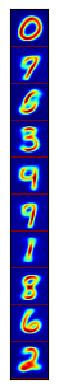

In [3]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')


# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(A))

plt.imsave('aa.png', image)

In [4]:
print(type(pred_label))
print(pred_label.shape)
print(type(X0))

<class 'numpy.ndarray'>
(10000,)
<class 'numpy.ndarray'>


In [5]:
N0 = 20
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(n_neighbors=N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

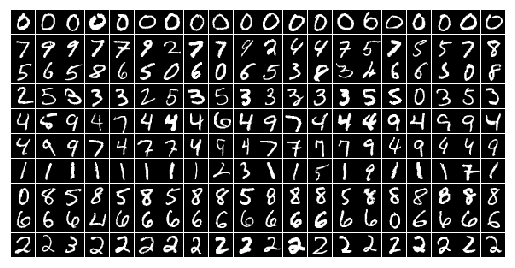

In [6]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

# import scipy.misc
# scipy.misc.imsave('bb.png', A)


# plt.axis('off')
# A = display_network(X1.T, 10, N0)
# scipy.misc.imsave('cc.png', A)
# f2 = plt.imshow(A, interpolation='nearest' )
# plt.gray()

# plt.show()